In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import os

In [3]:
#network and training parameters:
EPOCHS = 100 #how many iterations we run the training set
BATCH_SIZE = 128
VERBOSE = 1 #no idea what this is but lets see...
NB_CLASSES = 10 #10 digits
N_HIDDEN = 1000 #number of nodes in hidden layer
VAL_SPLIT = 0.2  #how much of sample is reserved for validation


In [ ]:
#first we need to accumulate the data... we start off with a small NN... 2000 samples of global view? 500 from each?
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]
pl_entry=os.scandir('data_red/global')
fps_entry=os.scandir('fps_red/global')
npl_entry=os.scandir('nonpl_data_red2/global')
nfps_entry=os.scandir('nonpl_fps_red2/global')
np.random.seed(122334)

pl_entry=list(pl_entry)
fps_entry=list(fps_entry)
npl_entry=list(npl_entry)
nfps_entry=list(nfps_entry)

np.random.shuffle(pl_entry)
np.random.shuffle(fps_entry)
np.random.shuffle(npl_entry)
np.random.shuffle(nfps_entry)

tot=2100
bp=1900

i=0
for el in list(pl_entry):
    df=pd.read_csv('data_red/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(i>=bp):
        X_test.append(np.array(df['flux'].iloc[0:2000]))
        Y_test.append([1,0,0])
    else:
        X_train.append(np.array(df['flux'].iloc[0:2000]))
        Y_train.append([1,0,0])
    i=i+1
    if(i==tot): break

j=0
for el in list(fps_entry):
    df=pd.read_csv('fps_red/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(j>=bp):
        X_test.append(np.array(df['flux'].iloc[:2000],dtype='float32'))
        Y_test.append([0,1,0])
    else:
        X_train.append(np.array(df['flux'].iloc[:2000]))
        Y_train.append([0,1,0])
    j=j+1
    if(j==tot): break 

k=0
for el in list(npl_entry):
    df=pd.read_csv('nonpl_data_red2/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(k>=bp/2):
        X_test.append(np.array(df['flux'].iloc[0:2000]))
        Y_test.append([0,0,1])
    else:
        X_train.append(np.array(df['flux'].iloc[0:2000]))
        Y_train.append([0,0,1])
    k=k+1 
    if(k==tot/2): break

l=0
for el in list(nfps_entry):
    df=pd.read_csv('nonpl_fps_red2/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(l>=bp/2):
       X_test.append(np.array(df['flux'].iloc[:2000]))
       Y_test.append([0,0,1])
    else:
        X_train.append(np.array(df['flux'].iloc[:2000]))
        Y_train.append([0,0,1])
    l=l+1
    if(l==tot/2): break

print(np.array(X_train).shape,np.array(Y_train).shape)
print(np.array(X_test).shape,np.array(Y_test).shape)
np.savetxt('Xtrain.csv', np.array(X_train), delimiter=',')
np.savetxt('Ytrain.csv', np.array(Y_train), delimiter=',')
np.savetxt('Xtest.csv', np.array(X_test), delimiter=',')
np.savetxt('Ytest.csv', np.array(Y_test), delimiter=',')

In [12]:
#first we need to accumulate the data... we start off with a small NN... 2000 samples of global view? 500 from each?
X_train_l=[]
X_test_l=[]
Y_train=[]
Y_test=[]
X_train_g=[]
X_test_g=[]
pl_entry=os.scandir('data_red/local')
fps_entry=os.scandir('fps_red/local')
npl_entry=os.scandir('nonpl_data_red2/local')
nfps_entry=os.scandir('nonpl_fps_red2/local')
np.random.seed(122334)

pl_entry=list(pl_entry)
fps_entry=list(fps_entry)
npl_entry=list(npl_entry)
nfps_entry=list(nfps_entry)

np.random.shuffle(pl_entry)
np.random.shuffle(fps_entry)
np.random.shuffle(npl_entry)
np.random.shuffle(nfps_entry)

tot=1500
bp=1400

i=0
for el in list(pl_entry):
    dfl=pd.read_csv('data_red/local/'+el.name,sep=" ")
    dfg=pd.read_csv('data_red/global/'+el.name[:11]+'_g',sep=" ")
    if(len(dfl['flux'])<200): continue
    if(i>=bp):
        X_test_l.append(np.array(dfl['flux'].iloc[0:200]))
        X_test_g.append(np.array(dfg['flux'].iloc[0:2000]))
        Y_test.append([1,0,0])
    else:
        X_train_l.append(np.array(dfl['flux'].iloc[0:200]))
        X_train_g.append(np.array(dfg['flux'].iloc[0:2000]))
        Y_train.append([1,0,0])
    i=i+1
    if(i==tot): break

j=0
for el in list(fps_entry):
    dfl=pd.read_csv('fps_red/local/'+el.name,sep=" ")
    dfg=pd.read_csv('fps_red/global/'+el.name[:11]+'_g',sep=" ")
    if(len(dfl['flux'])<200): continue
    if(j>=bp):
        X_test_l.append(np.array(dfl['flux'].iloc[:200],dtype='float32'))
        X_test_g.append(np.array(dfg['flux'].iloc[:2000],dtype='float32'))
        Y_test.append([0,1,0])
    else:
        X_train_l.append(np.array(dfl['flux'].iloc[:200]))
        X_train_g.append(np.array(dfg['flux'].iloc[:2000]))
        Y_train.append([0,1,0])
    j=j+1
    if(j==tot): break 

k=0
for el in list(npl_entry):
    dfl=pd.read_csv('nonpl_data_red2/local/'+el.name,sep=" ")
    dfg=pd.read_csv('nonpl_data_red2/global/'+el.name[:11],sep=" ")
    if(len(dfl['flux'])<200): continue
    if(k>=bp/2):
        X_test_l.append(np.array(dfl['flux'].iloc[0:200]))
        X_test_g.append(np.array(dfg['flux'].iloc[0:2000]))
        Y_test.append([0,0,1])
    else:
        X_train_l.append(np.array(dfl['flux'].iloc[0:200]))
        X_train_g.append(np.array(dfg['flux'].iloc[0:2000]))
        Y_train.append([0,0,1])
    k=k+1 
    if(k==tot/2): break

l=0
for el in list(nfps_entry):
    dfl=pd.read_csv('nonpl_fps_red2/local/'+el.name,sep=" ")
    dfg=pd.read_csv('nonpl_fps_red2/global/'+el.name[:11],sep=" ")
    if(len(dfl['flux'])<200): continue
    if(l>=bp/2):
       X_test_l.append(np.array(dfl['flux'].iloc[:200]))
       X_test_g.append(np.array(dfg['flux'].iloc[:2000]))
       Y_test.append([0,0,1])
    else:
        X_train_l.append(np.array(dfl['flux'].iloc[:200]))
        X_train_g.append(np.array(dfg['flux'].iloc[:2000]))
        Y_train.append([0,0,1])
    l=l+1
    if(l==tot/2): break

print(np.array(X_train_l).shape,np.array(X_train_g).shape,np.array(Y_train).shape)
print(np.array(X_test_l).shape,np.array(X_test_g).shape,np.array(Y_test).shape)
np.savetxt('Xtrain2g.csv', np.array(X_train_g), delimiter=',')
np.savetxt('Xtrain2l.csv', np.array(X_train_l), delimiter=',')
np.savetxt('Ytrain2.csv', np.array(Y_train), delimiter=',')
np.savetxt('Xtest2g.csv', np.array(X_test_g), delimiter=',')
np.savetxt('Xtest2l.csv', np.array(X_test_l), delimiter=',')
np.savetxt('Ytest2.csv', np.array(Y_test), delimiter=',')

(4200, 200) (4200, 2000) (4200, 3)
(300, 200) (300, 2000) (300, 3)


In [2]:
from sklearn.model_selection import train_test_split
X_train=np.loadtxt('training_data/Xtrain_av_clean.csv',delimiter=',')
Y_train=np.loadtxt('training_data/Ytrain_av_clean.csv',delimiter=',')
X_trainloc=np.loadtxt('training_data/Xtrainloc_av_clean.csv',delimiter=',')
#X_train=preprocessing.normalize(X_train)
#X_train=X_train[:,150:350]
#scalar=preprocessing.StandardScaler()
#scalar.fit(X_train)
#X_train=scalar.transform(X_train)
#X_train=X_train

Xtrain, Xtest, Ytrain, Ytest, Xtrainl, Xtestl = train_test_split(X_train, Y_train, X_trainloc, test_size=0.2)
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(2862, 2000) (2862, 2) (716, 2000) (716, 2)


In [14]:
#got the training set ... now write the neural net
#buid the model
#SGD stochastic gradient descent... 
IMGG=2000
IMGL=200

#add hidden layers
ip = keras.layers.Input(shape=(IMGG,),name='Input')
ipl = keras.layers.Input(shape=(IMGL,),name='Inputl')
x = keras.layers.BatchNormalization()(ip)
x = keras.layers.Dense(512,name='dense_layer',activation='tanh')(x)
x = keras.layers.Dense(512,name='dense_layer_2',activation='tanh')(x)
x = keras.layers.Dense(128,name='dense_layer_2b',activation='tanh')(x)
x = keras.layers.Dense(128,name='dense_layer_2c',activation='relu')(x)
x = keras.layers.Dense(64,name='dense_layer_3',activation='relu')(x)

xl = keras.layers.BatchNormalization()(ipl)
xl = keras.layers.Dense(128,name='Ldense_layer',activation='tanh')(xl)
xl = keras.layers.Dense(128,name='Ldense_layer_2',activation='tanh')(xl)
xl = keras.layers.Dense(64,name='Ldense_layer_2b',activation='tanh')(xl)
xl = keras.layers.Dense(64,name='Ldense_layer_2c',activation='relu')(xl)
xl = keras.layers.Dense(32,name='Ldense_layer_3',activation='relu')(xl)

x2 = keras.layers.Concatenate()([xl,x])
x2 = keras.layers.Dense(16,name='classify1',activation='relu')(x2)
x2 = keras.layers.Dense(1,name='classify2',activation='relu')(x2)
x2 = keras.layers.Dense(2,name='classify3',activation='softmax')(x2)
DenseNN = keras.Model(inputs=[ip,ipl], outputs=x2,name='Convolutional_NN')
DenseNN.summary()
DenseNN.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00005), loss='categorical_crossentropy',metrics=['accuracy'])

Model: "Convolutional_NN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputl (InputLayer)             [(None, 200)]        0                                            
__________________________________________________________________________________________________
Input (InputLayer)              [(None, 2000)]       0                                            
__________________________________________________________________________________________________
batch_normalization_13 (BatchNo (None, 200)          800         Inputl[0][0]                     
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 2000)         8000        Input[0][0]                      
___________________________________________________________________________________

In [15]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=DenseNN.fit([np.asarray(Xtrain),np.asarray(Xtrainl)],np.asarray(Ytrain), batch_size=64, epochs=100,
     verbose=1, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 2s 31ms/step - loss: 0.6934 - accuracy: 0.5343 - val_loss: 0.6930 - val_accuracy: 0.5497
Epoch 2/100
36/36 [==============================] - 1s 17ms/step - loss: 0.6930 - accuracy: 0.5408 - val_loss: 0.6929 - val_accuracy: 0.5497
Epoch 3/100
36/36 [==============================] - 1s 17ms/step - loss: 0.6929 - accuracy: 0.5408 - val_loss: 0.6928 - val_accuracy: 0.5497
Epoch 4/100
36/36 [==============================] - 1s 17ms/step - loss: 0.6929 - accuracy: 0.5408 - val_loss: 0.6928 - val_accuracy: 0.5497
Epoch 5/100
36/36 [==============================] - 1s 17ms/step - loss: 0.6928 - accuracy: 0.5408 - val_loss: 0.6927 - val_accuracy: 0.5497
Epoch 6/100
36/36 [==============================] - 1s 17ms/step - loss: 0.6927 - accuracy: 0.5408 - val_loss: 0.6926 - val_accuracy: 0.5497
Epoch 7/100
36/36 [==============================] - 1s 17ms/step - loss: 0.6927 - accuracy: 0.5408 - val_loss: 0.6925 - val_accuracy: 0.5497
Epoch 

KeyboardInterrupt: 

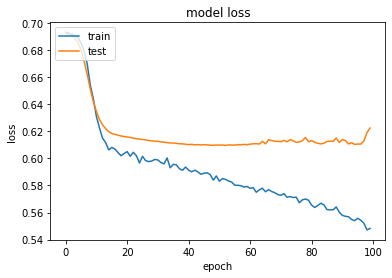

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('present_fullyconnected_loss_glob.png')
plt.show()

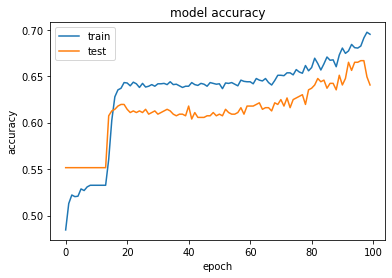

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('present_fullyconnected_acc_global.png')
plt.show()

In [26]:
test_loss, test_acc = model.evaluate(np.array(Xtest), np.array(Ytest))
print('Test accuracy:', test_acc)
Ypred_raw=model.predict(np.array(Xtest))
Ypred=np.argmax(Ypred_raw, axis=1)
Ytest_new=np.argmax(Ytest,axis=1)
cm = confusion_matrix(Ytest_new, Ypred)
print(cm)

23/23 [==============================] - 0s 8ms/step - loss: 0.6856 - accuracy: 0.6760
Test accuracy: 0.6759776473045349
[[220  95]
 [137 264]]
